# Pymaceuticals Inc.
---

### Summary

- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
main_df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [120]:
# Checking the number of mice.
main_df['Mouse ID'].nunique()

249

In [121]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = main_df[main_df.duplicated(['Mouse ID','Timepoint'])]
duplicated_mice.values

array([['g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 5, 47.57039208, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 10, 49.8805278, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 15, 53.44201976, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 20, 54.65765008, 1, 'Propriva', 'Female', 21, 26]],
      dtype=object)

In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
main_df.loc[main_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = main_df[main_df['Mouse ID'] !='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [124]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [125]:
regimen = clean_df.groupby('Drug Regimen')

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_volume = regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen['Tumor Volume (mm3)'].median()
variance = regimen['Tumor Volume (mm3)'].var()
st_dv = regimen['Tumor Volume (mm3)'].std()
std_err = regimen ['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume
                                  , 'Median Tumor Volume': median_tumor_volume
                                  , 'Tumor Volume Variance': variance
                                  , 'Tumor Volum Std. Dev.': st_dv
                                  , 'Tumor Volum Std. Err.': std_err})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volum Std. Dev.,Tumor Volum Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

regimen.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_time = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending = False)
drug_time.plot(kind = 'bar', x = 'Drug Regimen', y = 'Timepoint', color="blue", alpha = 0.75, 
               xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')
++



SyntaxError: invalid syntax (731990043.py, line 5)

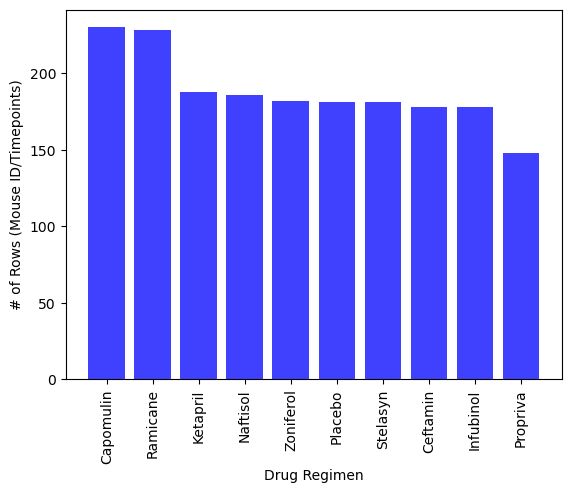

In [129]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_time = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending = False)
drug_regimens = drug_time.index
counts = drug_time.values

# Create a bar plot using pyplot
plt.bar(drug_regimens, counts, color='blue', alpha=0.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=90)
plt.show()

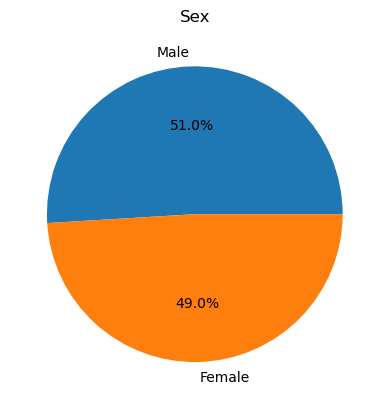

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts()
gender.plot.pie(autopct='%1.1f%%', startangle=0, title= 'Sex')
plt.ylabel('')
plt.show()


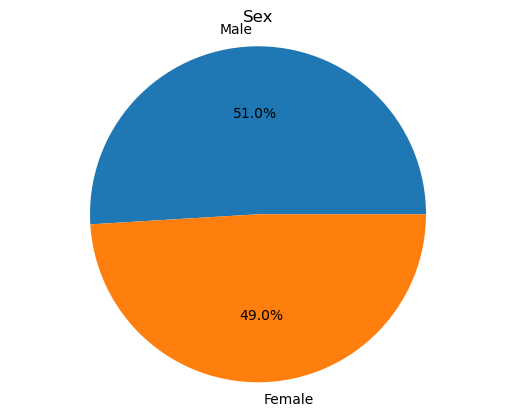

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=0)
plt.title('Sex')
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
final_tumor_volume_df = clean_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = final_tumor_volume_df.sort_values(['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimen)]
max_timepoint_df = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_volume_df = final_tumor_volume_df.merge(max_timepoint_df, on=['Mouse ID', 'Timepoint'])
max_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volume
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in treatment_regimen:
    
    tumor_volume_by_drug = max_tumor_volume_df[max_tumor_volume_df['Drug Regimen'] == drug]    
    tumor_volume_by_drug = tumor_volume_by_drug['Tumor Volume (mm3)']
    
    quartiles = tumor_volume_by_drug.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    iqr = q3 - q1
    iqr_1_5 = iqr * 1.5
    
    
    q1_bound = q1 - iqr_1_5
    q3_bound = q3 + iqr_1_5
    outliers = [q1_bound, q3_bound]
    
    potential_outliers = []
    for value in tumor_volume_by_drug:
        if value < q1_bound or value > q3_bound:
            potential_outliers.append(value)
    
    print(f"{drug}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


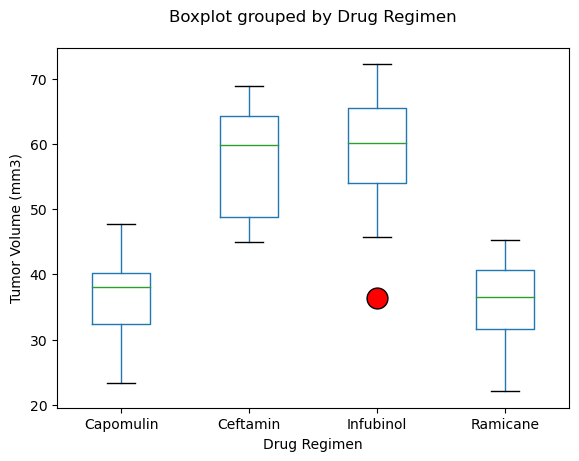

In [134]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize = 15, color = 'black')

# Assuming 'max_tumor_volume_df' is your DataFrame
max_tumor_volume_df.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', flierprops=flierprops)

plt.title('')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False) 

plt.show()

## Line and Scatter Plots

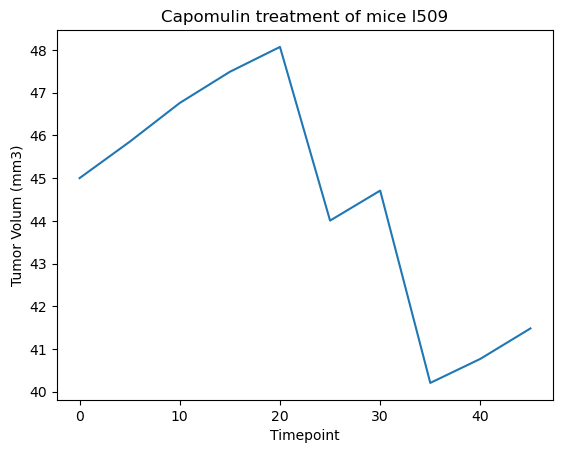

In [139]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treated_mice = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)','Weight (g)']]
treated_mice = treated_mice[treated_mice['Drug Regimen'] == 'Capomulin']
treated_mice_I509 = treated_mice[treated_mice['Mouse ID'] == 'l509']

plt.plot(treated_mice_I509['Timepoint'], treated_mice_I509['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mice l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volum (mm3)')
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

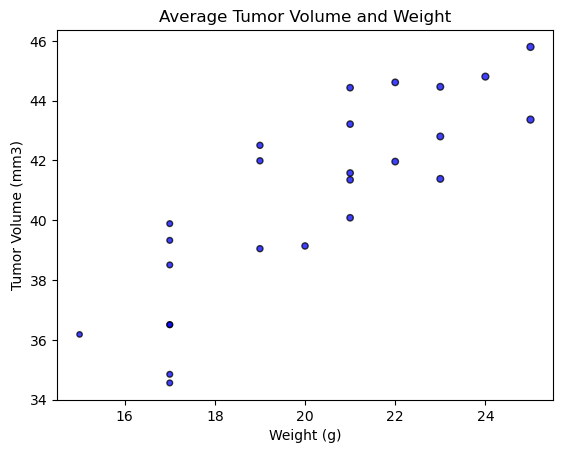

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Create df with average weight and average tumor volume
#group by Mouse ID
mouse_data = treated_mice.groupby("Mouse ID")
#variables to hold column data
mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()
#create new df
mouse_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


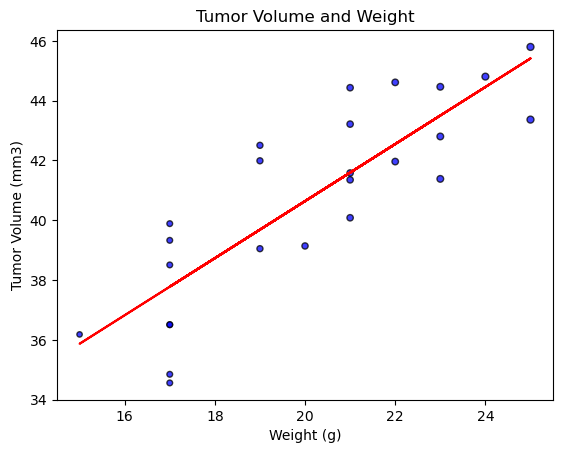

In [118]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")